# Início: 27/09/2021

Uma Máquina de Vetores de Suporte (SVM) é um modelo muito poderoso e versátil de Aprendizado de Máquina capaz de fazer classificações lineares ou não lineares, de regressão e até mesmo detecção de outliers. É um dos modelos mais populares no Aprendizado de Máquina e qualquer pessoa com interesse nesse assunto deve tê-lo em sa caixa de ferramentas. As SVMs são perticularmente adequadas para a classificação de conjuntos de dados complexos, porém de pequeno ou médio porte. Esse capítulo é dedicao a explicar o seus conveitos básicos, bem como utilizá-las e como funcionam.

### Classificação Linear das SVM

A ideia base por trás das SVMs é melhor explicada com uma imagem. O código a seguir mostra parte do conjunto de dados das íris que foi usado no capítulo anterior. As duas classes podem ser divididas facilmente com uma linha reta (elas são *separadas linearmente*). A plotagem na esquerda mostra os limites de decisão de três possíveis classificadores lineares. O modelo cujo limite de decisão é representado pela linha tracejada é tão ruim que nem consegue separar as classes corretamente. Os outros dois modelos funcionam perfeitamente neste conjunto, mas os seus limites de decisão chega, tão perto das instâncias que possivelmente não fncionarão tão bem em novas instâncias. Por outro lado, a linha contínua na plotagem à direita representa o limite de decisão de um classificador SVM; esta linha não separa somente as duas classes, mas também fica o mais longe possível das instâcias de treino. Podemos pensar em um classificados SVM como o preenchimento da via mais larga possível entre as classes, representada pelas linhas tracejadas paralelas. Isso é conhecido como *classificação de margens largas*:

In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('axes', labelsize=14)
matplotlib.rc('xtick', labelsize=12)
matplotlib.rc('ytick', labelsize=12)

In [4]:
from sklearn.svm import SVC
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] # comprimento e largura da pétala
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# Classificador do modelo SVM
svm_clf = SVC(kernel='linear', C=float('inf'))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [6]:
# Modelos ruins
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

In [7]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # No limite de decisão, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180,
                facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-', linewidth=2)
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

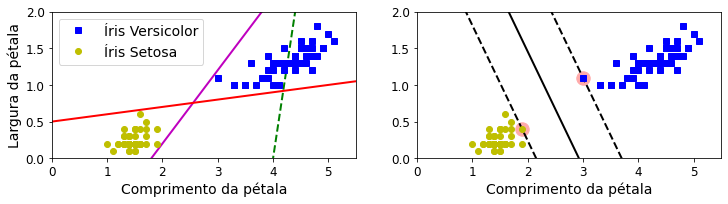

In [8]:
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs",
         label="Íris Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo",
         label="Íris Setosa")
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

Note que ao adicionarmos mais instâncias de treino "fora da via" não interfere o limite de decisão: ele está totalmente determinado, ou "suportado", pelas instâncias localizadas na borda dessa via. Essas instâncias são conhecidas como *vetores de suporte* (são os pontos circulados na plotagem à direita).

As SVMs são muito sensíveis às escalar das características, como podemos ver na plotagem a seguir. Na esquerda, a escala do eixo das ordenadas é muito maior que o das abscissas, logo a via é mais larga está mais próxima da horizontal. Após fazer um escalonamento, o limite de decisão parece bem melhor, visto na plotagem direita:

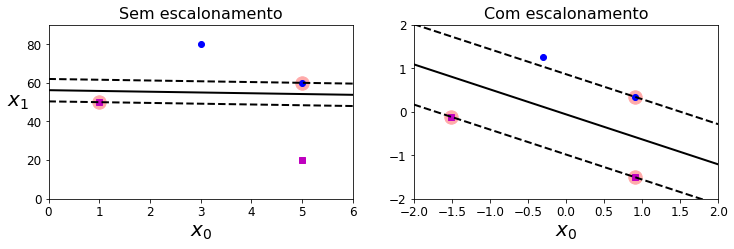

In [9]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(
np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Sem escalonamento", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Com escalonamento", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

**Classificação de Margem Suave**

Se inputarmos estritamento que todas as instâncias estejam fora da via e do lado direito, estaremos aplicando uma *classificação de margem rígida*, que possui duas questões principais. A primeira é que ela só funciona se os dados forem linearmente separáveis. Segundo, ela é bastante sensível aos outliers. O código a seguir mostra um conjunto de dados da íris com apenas um outlier adicional à esquerda, é bem impossível achar uma margem rígida e à direita o limite de decisão termina bem diferente do que vimos na primeira imagem sem outlier, e possivelmente não generaliza muito bem:

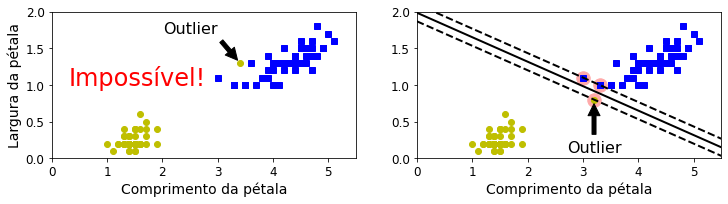

In [10]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossível!", fontsize=24, color="red")
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

É melhor usar um modelo mais flexível para evitar esses problemas. O objetivo é achar um bom equilíbrio entre manter a via o mais larga possível e limitar as *violações de margem*, ou seja, as instâncias que acabam no meio da via ou até mesmo do lado errado. Isto é conhecido como *classificação de margem suave*.

Em SVM do Scikit-Learn podemos controlar esse equiçíbrio ao utilizar o hiperparâmetro **C**: um valor menor de **C** leva a uma via mais larga, mas a consequência é ter mais violações de margem. O código abaixo mostra os limites de decisão e as margens de dois classificadores SVM de margem suave em um conjnto de dados não linearmente separáveis. Na plotagem da direita, ao utilizar um valor de **C** alto, o classificador faz menos violações na margem, porém fica com uma margem menor. Na plotagem à esquerda, ao utilizar um valor de **C** baixo, a margem fica muito maior, mas muitas instâncias ficam na "contramão". Contudo, parece provável que o segundo classificador generalizará melhor: na verdade, mesmo com este conjunto de treino ele comete menos erros de previsão, uma vez que a maioria das violações da margem está no lado correto do limite de decisão.

O código usando o Scikit-Learn abaixo carrega o conjunto de dados da íris, escalona as características e treina o modelo SVM linear, usado a classe **LinearSVC** com *C = 1*  e a função *hinge loss*, para detectar as flores Íris Virginica. O resultado será mostrado na plotagem abaixo:

In [11]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [12]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64) # Íris Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge',
                             random_state=42))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Como de costume, podemos usar o modelo para fazer previsões:

In [13]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

Diferente dos classificadores de Regressão Logística, os classificadores SVM não representam probabilidades para cada classe.

Agora, vamos gerar a plotagem para comprar as duas configurações de regularização:

In [14]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss='hinge', random_state=42)
svm_clf2 = LinearSVC(C=100, loss='hinge', random_state=42)

scaled_svm_clf1 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf1)
])
scaled_svm_clf2 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf2)
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

D:\Jupyter\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [15]:
# Converter para parâmetros não escalonados
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Encontrar os vetores de suporte (LinearSVC não faz isso automático)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

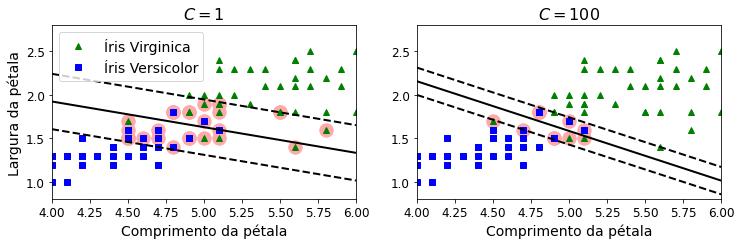

In [16]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",
         label="Íris Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",
         label="Íris Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.ylabel("Largura da pétala", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title(f"$C = {svm_clf1.C}$", fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Comprimento da pétala", fontsize=14)
plt.title(f"$C = {svm_clf2.C}$", fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.show()

Como uma alternativa, poderiamos usar a classe **SVC** ao usar os hiperparâmetros **kernel** como *linear* e **C** como 1, mas fica muito lento, principalmente em grandes conjuntos de treino. Já sabemos que não é recomendável. Outra opção seria utilizar a classe **SGDClassifier** em os hiperparâmetros **loss** como *hinge* e **alpha** como 1/(m * C), o que aplicará o GD Estcástico regular no treino de um classificador linear SVM. Ele não converge tão rápido, mas pode ser útil para manipular enormes quantidades de dados que não cabem na memória (out-of-core), ou para manipular tarefas de classificação online.

A classe **LinearSVC** regulariza o termo de polarização, portanto podemos centrar primeiro o conjunto de treinamento subtraindo sua média. Este processo é automatizado se escalonarmos os dados usando o **StandardScaler**. Além disso, devemos certifiar de configurar o hiperparâmetro **loss** para **hinge**, já que ele não é o valor padrão. Por fim, para um melhor desempenho, devemos configurar o hiperparâmetro **dual** para *False*, a menos que haja mais características do que instâncias de treino.

### Classificação SVM Não Linear

Mesmo que os classificadores lineares SVM sejam eficientes e funcionem muito bem em diversos casos, muitos conjuntos de dados não estão nem estão na sombra de serem linearmentes separáveis. Adicionar mais características, como as polinomiais é uma maneira válida para lidar com os conjuntos de dados não lineares; em alguns casos, isso pode resultar em um conjunto de dados linearmente separáveis. Consideremos a plotagem a seguir: ela mostra um conjunto de dados simples com apenas uma característica *x1*. Como podemos obsevar, este conjunto de dados não é linearmente separável. Porém, se adicionarmos uma segunda característica, *x1* = (*x1*)^2, o conjunto de dados 2D retornado será perfeitamente separável linearmente:

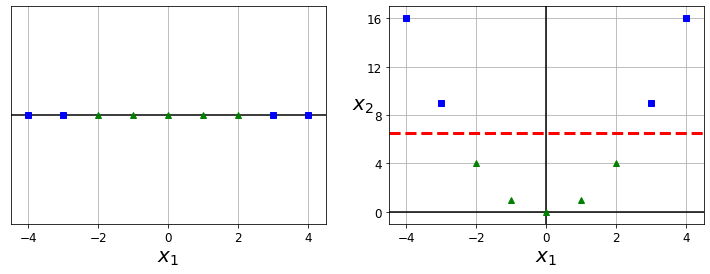

In [17]:
X1D = np.linspace(-4, 4, 9). reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

Para colocar essa ideia em prática com o Scikit-Learn, criamos um **Pipeline** contendo um transformador **PolynomialFeatures**, seguido de um **StandardScaler** e uma **LinearSVC**. Testaremos isso no conjunto de dados em formato de duas luas, ou um *yin yang* (se forçar bem a imaginação):

In [18]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [19]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge',
                          random_state=42))
])

polynomial_svm_clf.fit(X, y)

D:\Jupyter\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [20]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg,
                 alpha=0.1)

In [21]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'$x_1$', fontsize=20)
    plt.ylabel(r'$x_2$', fontsize=20, rotation=0)

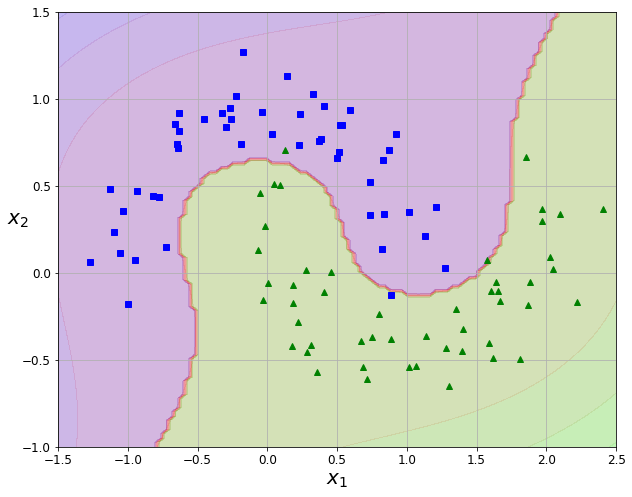

In [22]:
eixos = [-1.5, 2.5, -1, 1.5]

plt.figure(figsize=(10, 8))

plot_predictions(polynomial_svm_clf, eixos)
plot_dataset(X, y, eixos)

plt.show()

**Kernel Polinomial**

Implementar a adição de características polinomiais é simples e pode funcionar bem se os tipo de algoritmos de AM (não somente as SVMs), mas com um baixo grau polinomial não conseguimos lidar com conjuntos de dados muito complexo, e com um alto grau de polinômio geramos muitas características, o que deixa o modelo mais lento.

Felizmente, ao usar as SVMs, aplicamos uma técnica matemática conhecida por *truque do kernel*. Isso permite obtermos mesmo resultado como se adicionassemos diversas características polinomiais, mesmo com polinômios de alto grau, sem realmente precisar adicioná-las. Logo, não existe nenhuma explosão combinatória da quantidade de características, pois não adicionamos nenhuma de verdade. Este truque milagroso é implementado pela classe **SVC**. Camos testá-lo no conjunto de dados anterior:

In [23]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [24]:
poly100_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

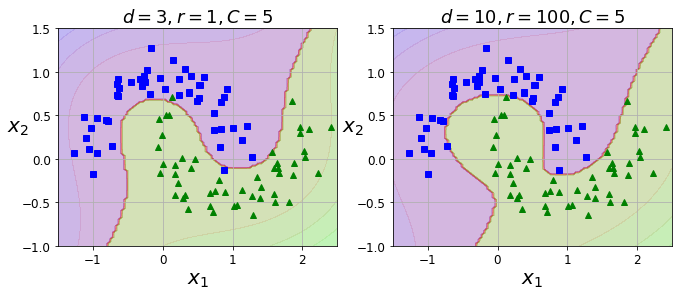

In [25]:
plt.figure(figsize=(11, 4))

eixos = [-1.5, 2.5, -1, 1.5]

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, eixos)
plot_dataset(X, y, eixos)
plt.title(r'$d=3, r=1, C=5$', fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, eixos)
plot_dataset(X, y, eixos)
plt.title(r'$d=10, r=100, C=5$', fontsize=18)

plt.show()

Ao usar um kernel polinomial de 3º grau, o código acima treina um classificador SVM. Na plotagem da direita, temos um classificador SVM treinado com um kerne e o grau 10. Claramente, se o nosso modelo estiver se **sobreajustando** é necessário **reduzir** o grau polinomial. Por outro lado, se estiver se **subajustando**, é necessário **aumentá-lo**. O hiperparâmetro **coef0** controla o quanto o modelo é influenciado por polinômios de alto grau versus polinômios de baixo grau.

**Adicionando Características de Similaridade**

Outra solução para resolver problemas não lineares é a adição de características calculadas ao usar uma *função de similaridade*, que mede o quanto cada instância se assemelha ao *ponto de referência* específico. Por exemplo, vamos usar o conjunto de dados unidimensional anterior e adicionar dos pontos de referência em *x1 = -2* e *x1 = 1*. A seguir, definimos a função de similaridade como *Função de Base Radical* (RBF, em inglês) Gaussiana com *γ = 0.3*:

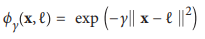

***Equação 5-1: RBF Gaussiana***

In [26]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [27]:
gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma),
           gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

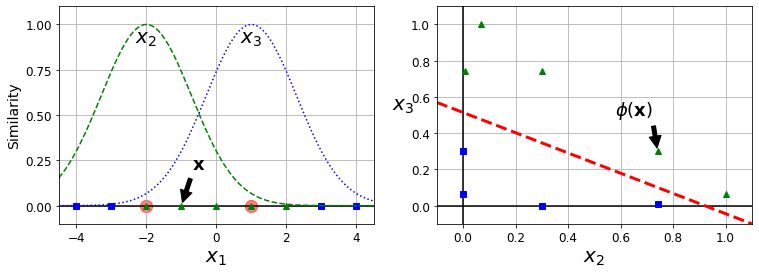

In [28]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

plt.show()

In [29]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]),
                     np.array([[landmark]]), gamma)
    print(f'Phi({x1_example}, {landmark}) = {k}')

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


A fução descrita na Equação 5-1 forma um sino que varia de 0 (bem longe do ponto de referência) a 1 (no ponto de referência). Agora estamos prontos para calcular as novas características. Por exemplo, note a instância  *x1 = -1*, localizada a uma distâcia de 1 do primeiro ponto de referência e 2 do outro. Então, sas novas características são *x2 = exp(-0,3 x 1^2) ≈ 0,74* e *x3 = exp(-0,3 x 2^2) ≈ 0,30*. A plotagem da direita mostra o conjunto de dados transformado. Como podemos perceber, agora as caraterísticas são linearmente separáveis.

Mas podemos nos pergntar sobre como selecionar os pontos de referência. A maneira mais simples seria criar um ponto de localização de cada instância no conjunto de dados. Isso gerará muitas dimensões e aumentará as chances de o conjunto de treino transformado ser linearmente separável. A desvantagem é que um conjunto de treino com *m* instâncias e *n* características se transforma em um conjunto de treino com *m* instâncias e *m* características. Se o conjunto for enorme, ficaremos com um número igualmente enorme de características.

**Kernel RBF Gaussiano**

Do mesmo modo que as características polinomiais, o método de características de similaridade pode ser útil com qualquer algoritmo de AM, porém poderá ter um custo computacional elevado para calcular todas as características adicionais, especialmente em enormes conjuntos de treino. Todavia, mais um vez, o truque do kernel faz seu milagre na SVM: possibilita a obtenção de um resultado semelhate, como se tivessemos adicionado diversas características de similaridade sem realmente precisar adicioná-las. Vamos tentar o *kernel RBF Gaussiano* com a utilização da classe **SVC**:

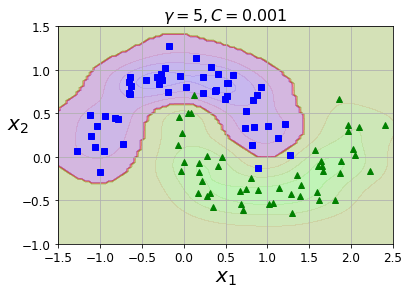

In [30]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

eixos = [-1.5, 2.5, -1, 1.5]
plot_predictions(rbf_kernel_svm_clf, eixos)
plot_dataset(X, y, eixos)

plt.title(r'$\gamma=5, C=0.001$', fontsize=16)

plt.show()

Aumentar **gamma** estreita a curva em forma de sino e como consequência, cada raio de influência da instância será menor: mexer em volta de instâncias individuais torna o limite de decisão mais irregular. Por outro lado, um menos valor de **gamma** torna a crva em forma de sino mais ampla, de modo que as instâncias ficam com um maior raio de influência e o limite de decisão mais suave. Então **gamma** atua como um hiperparâmetro de regularização: se o nosso modelo estiver **sobreajustado**, devemos **reduzi-lo**, se estiver **subajustado** devemos -**aumentá-lo**, bem como o hiperparâmetro **C**:

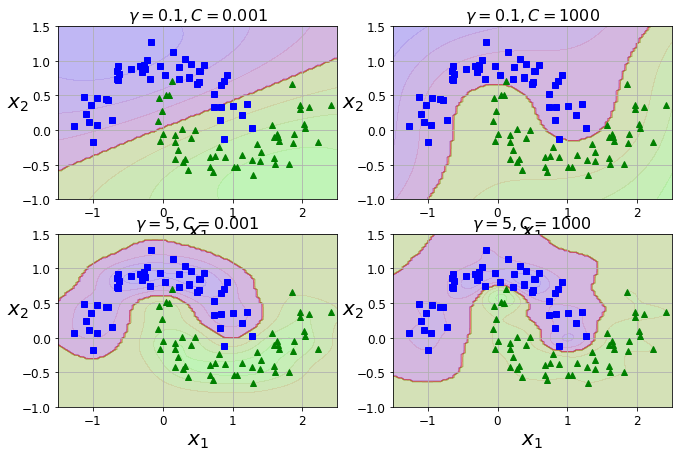

In [31]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

eixos = [-1.5, 2.5, -1, 1.5]

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, eixos)
    plot_dataset(X, y, eixos)
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

Há outros kernels, mas eles são bem raros de serem vistos. Por exemplo, alguns kernels são especializados em estrutura de dados específicos. Algumas vezes, *string kernels* são usados na classificação de documentos de textos ou sequências de DNA, por exemplo ao usar o *string subsequence kernel* ou kernels baseados em *distância Levenshtein*.

Com tanto kernels disponíveis, como escolher um para usar? Como regra geral, devemos sempre tentar o kernel linear primeiro (vale lembrar que **LinearSVC** é muito mais rápido do que o **SVC(kernel='linear')**), particularmente se o conjunto de treino for enorme ou se tiver várias características. Se o conjunto de treino não for muito grande, podemos tentar o kernel RBF Gaussiano; ele funciona bem na maior parte dos casos.

### Regressão SVM

Como mostrado anteriormente, o algoritmo SVM é muito versátil: ele não só suporta a classificação linear a não linear, como tambéma Regressão Linear e não linear. A manha é reverter o objetivo:  ao invés de tentarmos preencher a maior via possível entre das classes, limitando as violações da margem, a Regressão SVM tenta preencher o maior número possível de instâncias *na* via limitando as violações da margem, isto é: instâncias *fora* da via. A largura da via é controlada pelo hiperparâmetro **ϵ**. O código a seguir mostra dois modelos de SVM de Regressão Linear treinados em algum dado linear aleatório, um com margem larga (*ϵ = 1,5*) e o outro com a margem mais estreita (*ϵ = 0,5*):

In [38]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [39]:
from sklearn.svm import LinearSVR

In [41]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

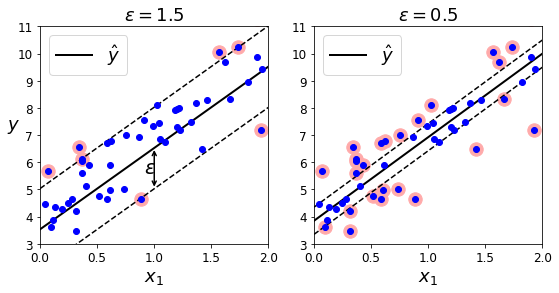

In [42]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-', linewidth=2,
             label=r'$\hat{y}$')
    plt.plot(x1s, y_pred + svm_reg.epsilon, 'k--')
    plt.plot(x1s, y_pred - svm_reg.epsilon, 'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_],
               s=180, facecolors='#FFAAAA')
    plt.plot(X, y, 'bo')
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.axis(axes)
    
eixos = [0, 2, 3, 11]

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, eixos)
plt.title(fr"$\epsilon = {svm_reg1.epsilon}$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->',
                                       'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, eixos)
plt.title(fr"$\epsilon = {svm_reg2.epsilon}$", fontsize=18)

plt.show()

Adicionar mais instâncas de treino dentro da margem não atrapalha as previsões do modelo, desse modo, o modelo é chamade de *ϵ-insensitive*.

O código a seguir usa a classe **LinearSVR** do Scikit-Learn para executar a regressão SVM linear. O código a seguir produz o modelo representado na esquerda da imagem acima.

In [40]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

Para enfrentar tarefas de regressão não linear, podemos usar um modelo SVM kernelizado. Por exemplo, no código a seguir é mostrada a Regressão SVM em um conjunto de treino quadrático aleatório usando um kernel polinomial de grau 2. Há pouca regularização na plotagem da esquerda, ou seja, um valor grande de **C** e muito mais regularização na plotagem da direita, isto é: um valor de **C** pequeno:

In [45]:
from sklearn.svm import SVR

In [51]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [58]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100,
                    epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2,
                    C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

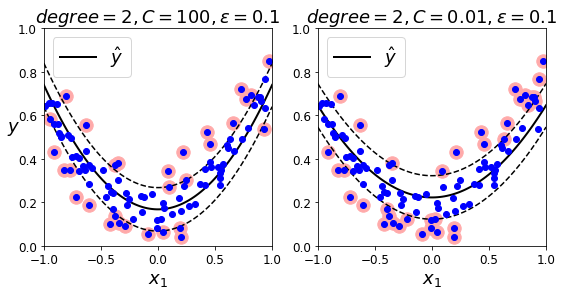

In [59]:
eixos = [-1, 1, 0, 1]
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, eixos)
plt.title(fr"$degree={svm_poly_reg1.degree}, C={svm_poly_reg1.C}, \epsilon = {svm_poly_reg1.epsilon}$",
          fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, eixos)
plt.title(fr"$degree={svm_poly_reg2.degree}, C={svm_poly_reg2.C}, \epsilon = {svm_poly_reg2.epsilon}$",
          fontsize=18)

plt.show()

O código abaixo produz o modelo representado na esquerda da plotagem acima usando a classe **SVR** do Scikit-Learn. A classe **SVR** é o equivalente de regressão da classe **SVC**, e a classe **LinearSVR** é o equivalente de regressão da classe **LinearSVC**. A classe **LinearSVR** escalona linearmente com o tamanho do conjunto de treino (assim como a classe **LinearSVC**), enquanto a classe **SVR** fica bem mais lenta à medida que o conjnto de treino cresce, assim como a classe **SVC**:

In [46]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

### Nos Bastidores

Essa parte é só teoria de como funciona as SVMs. Voltarei aqui quando tiver mais compreensão das SVMs.

### Exercícios

**1. Qual é a ideia fundamental por trás das Máquinas de Vetores de Suporte (SVM)?**

A ideia fundamental por trás das SVMs é adequar a "via" mais larga possível entre as classes. De outra maneira, é ter a maior margem possível entre o limite de decisão, que separa as duas classes, e as instâncias de treino. Ao realizar a classificação de margem suave, a SVM procra m compromisso entre a separação perfeita das duas classes e a existência da via ampla possível. Outra ideia importante é usar kernels para treinar dados não lineares.

**2. O que é um vetor de suporte?**

Um vetor de suporte é qualquer instância presente na "via" após o treino de uma SVM, incluindo a sua borda. A fronteira de decisão é inteiramente determinada pelos veotrs de suporte. Qualquer instância que não seja um vetor, ou seja, fora da via, não terá influência nenhuma; podendo ser removidos, adicionados ou até mesmo movê-los e, desde que fiquem fora da via, eles não afetarão o limite de decisão. O cáculo das previsões engloba apenas os vetores de suporte, não todo o conjunto de treino.

**3. Por que é importante dimensionar as entradas ao utilizar SVM?**

As SVMs tentam ajustar a maior "via" possível entre as classes, logo, se o conjunto de treino não for escalonado, a SVM tenderá a excluir as pequenas características.

**4. Um classificador SVM pode produzir uma pontuação de confiança quando
classifica uma instância? E quanto a uma probabilidade?**

Um classificador SVM pode gerar a distância entre a instância de teste e o limite de decisão, e podemos usar isso como pontuação de confiança. Porém, essa pontuação não pode ser convertida diretamente em uma estimativa da probabilidade da classe. Se configurarmos **probability** para *True* quando criarmos um SVM no Scikit-Learn, logo, depois do treino, ele calibrará as probabilidades usando a Regressão Logística nas pontuações da SVM, o que adicionará os métodos **predict_proba()** e **predict_log_proba()** na SVM.

**5. Você deve utilizar a forma primal ou dual do problema SVM no treinamento de
um modelo em um conjunto de treinamento com milhões de instâncias e centenas de características?**

Esta questão aplica-se apenas nas SVMs lineares,já que a kernelizada pode somente usar a forma dual. A compleidade dos cálculos do problema SVM da forma primal é proporcional ao número de instâncias de treino *m*, enquanto a complexidade dos cálculos da forma dual é proporcional a um número entre *m^2* e *m^3*. Então, caso haja milhões de instâncias, podemos definitivamente usar a forma primal, uma vez que a forma dual para esse caso é muito lenta.

**6. Digamos que você treinou um classificador SVM com o kernel RBF. Parece que ele
se subajusta ao conjunto de treinamento: você deve aumentar ou diminuir γ (gamma)?
E quanto ao C?**

Caso um classificador SVM treinado com um kernel RBF se subajuste ao conjunto de treino, poderá existir muita regularização. Para contornar isso, precisamos aumentar **gamma** ou **C** o até mesmo ambos.

# Término: 01/10/2021